# Task
Perform data cleaning and exploratory data analysis (EDA) on the Titanic dataset provided in the files "/content/train.csv", "/content/test.csv", and "/content/gender_submission.csv". Explore the relationships between variables and identify patterns and trends in the data.

## Load the data

### Subtask:
Load the training, testing and gender submission datasets into pandas DataFrames.


**Reasoning**:
Import pandas and load the three datasets into DataFrames as instructed.



In [1]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
gender_submission_df = pd.read_csv("/content/gender_submission.csv")

## Explore the data

### Subtask:
Display the first few rows, check the data types, and look for missing values in each DataFrame.


**Reasoning**:
Display the first few rows, data types, and missing values for each DataFrame as requested in the instructions.



In [2]:
print("First 5 rows of train_df:")
display(train_df.head())

print("\nFirst 5 rows of test_df:")
display(test_df.head())

print("\nFirst 5 rows of gender_submission_df:")
display(gender_submission_df.head())

print("\nData types of train_df:")
train_df.info()

print("\nData types of test_df:")
test_df.info()

print("\nData types of gender_submission_df:")
gender_submission_df.info()

print("\nMissing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

print("\nMissing values in gender_submission_df:")
print(gender_submission_df.isnull().sum())

First 5 rows of train_df:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



First 5 rows of test_df:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



First 5 rows of gender_submission_df:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1



Data types of train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Data types of test_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P

## Clean the data

### Subtask:
Handle missing values and convert data types as necessary.


**Reasoning**:
Handle missing values and convert data types as specified in the instructions.



In [3]:
# Fill missing Age values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent embarkation port
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Fill missing Fare value in test_df with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Convert 'Sex' column to numerical representation
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column to numerical representations using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')

# Verify no remaining missing values
print("\nMissing values in train_df after cleaning:")
print(train_df.isnull().sum())

print("\nMissing values in test_df after cleaning:")
print(test_df.isnull().sum())

# Check updated data types
print("\nData types of train_df after cleaning:")
train_df.info()

print("\nData types of test_df after cleaning:")
test_df.info()


Missing values in train_df after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Missing values in test_df after cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data types of train_df after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp     

/tmp/ipython-input-2012575222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-2012575222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## Perform eda

### Subtask:
Explore the relationships between variables using visualizations and statistical summaries.


**Reasoning**:
Calculate and display descriptive statistics and the correlation matrix for numerical columns, then create the requested visualizations to explore relationships between variables.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns in train_df:")
display(train_df.describe())

# 2. Calculate and display the correlation matrix for numerical columns
print("\nCorrelation matrix for numerical columns in train_df:")
display(train_df.corr())

# 3. Create a histogram for the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Create a bar plot to show the survival rate by 'Sex'
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# 5. Create a bar plot to show the survival rate by 'Pclass'
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 6. Create a box plot to explore the relationship between 'Survived' and 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Relationship between Survived and Fare')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Descriptive statistics for numerical columns in train_df:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200



Correlation matrix for numerical columns in train_df:


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

**Reasoning**:
The previous command failed because the `corr()` method was attempted on non-numerical columns. The Name column is still present and is a string. I need to drop non-numerical columns before calculating the correlation matrix and continue with the visualizations.



Descriptive statistics for numerical columns in train_df:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200



Correlation matrix for numerical columns in train_df:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


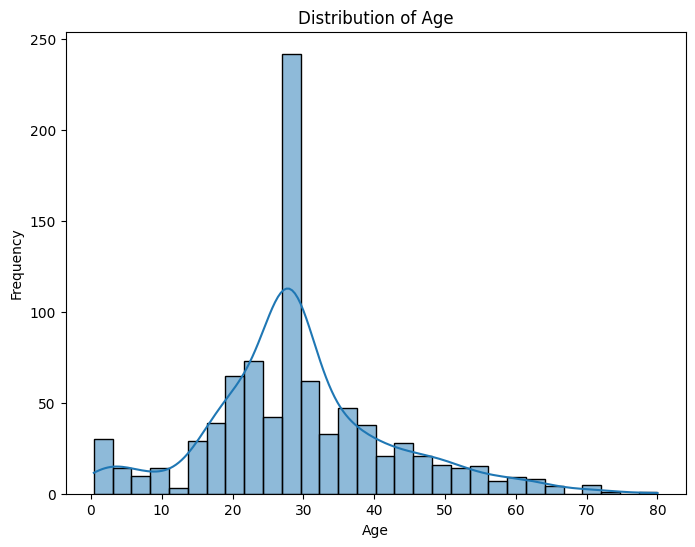

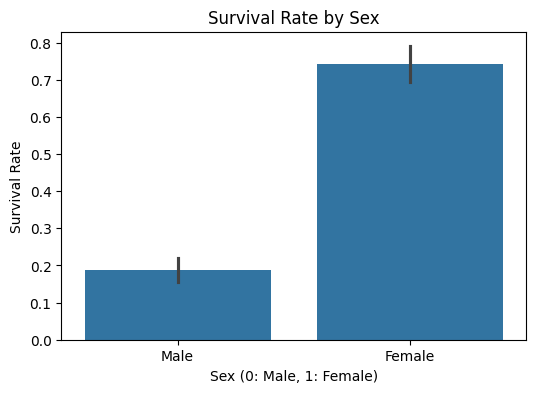

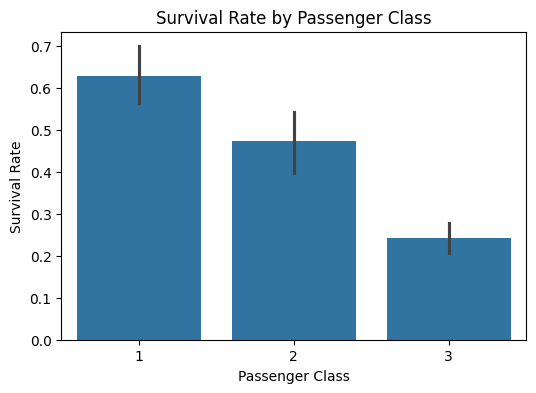

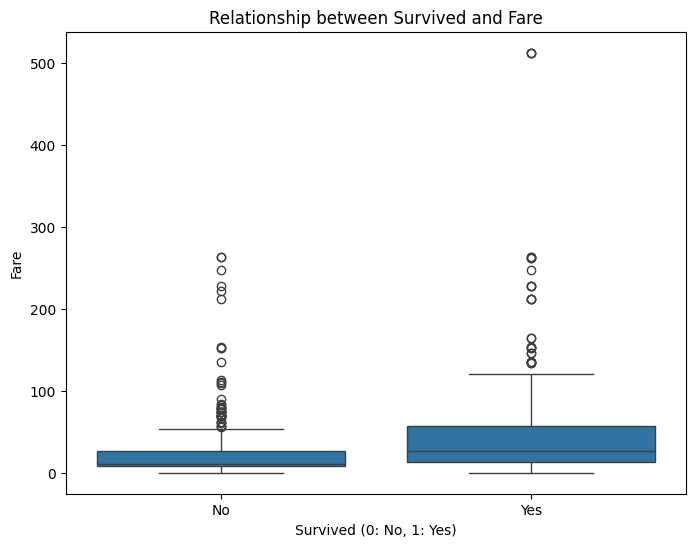

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Name' column before calculating correlation
train_df_numerical = train_df.drop(['Name', 'Ticket'], axis=1)


# 1. Calculate and display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns in train_df:")
display(train_df_numerical.describe())

# 2. Calculate and display the correlation matrix for numerical columns
print("\nCorrelation matrix for numerical columns in train_df:")
display(train_df_numerical.corr())

# 3. Create a histogram for the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Create a bar plot to show the survival rate by 'Sex'
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# 5. Create a bar plot to show the survival rate by 'Pclass'
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 6. Create a box plot to explore the relationship between 'Survived' and 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Relationship between Survived and Fare')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `train_df` contains 891 entries with missing values in 'Age', 'Cabin', and 'Embarked' columns.
*   The `test_df` contains 418 entries with missing values in 'Age', 'Fare', and 'Cabin' columns.
*   The 'Cabin' column in both datasets has a significant number of missing values (687 in train and 327 in test).
*   After cleaning, missing values in 'Age', 'Embarked', and 'Fare' were imputed, and the 'Cabin' column was dropped.
*   The 'Sex' column was successfully converted to a numerical representation (0 for male, 1 for female).
*   The 'Embarked' column in the training data was one-hot encoded.
*   Descriptive statistics and the correlation matrix for numerical columns were calculated and displayed.
*   Visualizations showed that:
    *   Females had a significantly higher survival rate than males.
    *   Passengers in higher classes (Pclass 1) had a higher survival rate than those in lower classes.
    *   Passengers who paid higher fares tended to have a higher survival rate.

### Insights or Next Steps

*   Gender, passenger class, and fare appear to be strong predictors of survival on the Titanic.
*   Further feature engineering and model building can be performed using the cleaned and transformed data to predict survival.
